In [69]:
import os
from glob import glob
import pandas as pd
import numpy as np

In [2]:
paths = {
  'AP_PATH': os.path.join('spine_dataset','AP'),
  'LA_PATH': os.path.join('spine_dataset','LA'),
}

In [74]:
def getcoordinate_AP(df_data):
  df_np = df_data.values
  df_np = np.array(np.around(df_np),dtype=np.int16)
  Lumbars_AP = {
    'L1':{
      'a':{'1':(df_np[0][0], df_np[0][1]),'2':(df_np[0][2], df_np[0][3])},
      'b':{'1':(df_np[1][0], df_np[1][1]),'2':(df_np[1][2], df_np[1][3])},
      'diag_num':df_np[1][4]
    },
    'L2':{
      'a':{'1':(df_np[2][0], df_np[2][1]),'2':(df_np[2][2], df_np[2][3])},
      'b':{'1':(df_np[3][0], df_np[3][1]),'2':(df_np[3][2], df_np[3][3])},
      'diag_num':df_np[3][4]
    },
    'L3':{
      'a':{'1':(df_np[4][0], df_np[4][1]),'2':(df_np[4][2], df_np[4][3])},
      'b':{'1':(df_np[5][0], df_np[5][1]),'2':(df_np[5][2], df_np[5][3])},
      'diag_num':df_np[5][4]
    },
    'L4':{
      'a':{'1':(df_np[6][0], df_np[6][1]),'2':(df_np[6][2], df_np[6][3])},
      'b':{'1':(df_np[7][0], df_np[7][1]),'2':(df_np[7][2], df_np[7][3])},
      'diag_num':df_np[7][4]
    },
    'L5':{
      'a':{'1':(df_np[8][0], df_np[8][1]),'2':(df_np[8][2], df_np[8][3])},
      'b':{'1':(df_np[9][0], df_np[9][1]),'2':(df_np[9][2], df_np[9][3])},
      'diag_num':df_np[9][4]
    }
  }
  return Lumbars_AP


In [75]:
Lumbars = {}
for i in (glob(paths['AP_PATH']+'/*.csv')):
  df = pd.read_csv(i,header=None)
  filename = os.path.basename(i).split(".")[0]
  Lumbars[filename] = getcoordinate_AP(df)

In [ ]:
Lumbars

In [77]:
import cv2
import matplotlib.pyplot as plt

In [97]:
def drawpoints(point1, point2):
  p1 = [point1[0],point2[0]]
  p2 = [point1[1],point2[1]]
  return p1, p2


0001-F-037Y0
[(876, 167), (1111, 169), (866, 314), (1120, 314)]
[(871, 344), (1117, 351), (848, 498), (1120, 511)]
[(842, 553), (1109, 557), (825, 706), (1118, 725)]
[(826, 775), (1112, 787), (801, 937), (1114, 958)]
[(798, 983), (1115, 980), (767, 1164), (1129, 1158)]
(2147, 1823, 3)


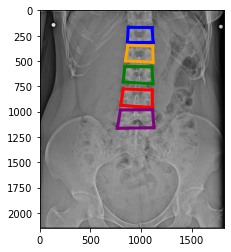

In [110]:
colors_text = {'L1':'blue', 'L2':'orange', 'L3':'green', 'L4':'red', 'L5':'purple'}
for i in (glob(paths['AP_PATH']+'/*.jpg')):
  filename = os.path.basename(i).split(".")[0]
  print(filename)
  # print(Lumbars[filename])
  for j in ['L1', 'L2', 'L3', 'L4', 'L5']:
    rectangle = [
      Lumbars[filename][j]['a']['1'], Lumbars[filename][j]['a']['2'],
      Lumbars[filename][j]['b']['1'], Lumbars[filename][j]['b']['2']
    ]
    print(rectangle)
    for points in [rectangle]:
      color_text = colors_text[j]
      p1, p2 = drawpoints(points[0],points[1])
      plt.plot(p1, p2, color=color_text, linewidth=3)
      p1, p2 = drawpoints(points[1],points[3])
      plt.plot(p1, p2, color=color_text, linewidth=3)
      p1, p2 = drawpoints(points[3],points[2])
      plt.plot(p1, p2, color=color_text, linewidth=3)
      p1, p2 = drawpoints(points[2],points[0])
      plt.plot(p1, p2, color=color_text, linewidth=3)
      
  img = cv2.imread(i)
  f = plt.figure()
  f.set_figwidth(4)
  f.set_figheight(1)
  print(img.shape)
  plt.imshow(img)
  plt.show()
  
  break

